In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=pd.read_csv("Resume-Data.csv")
print(data.head(10))

print(data.info())



   Resume_ID              Name  \
0          1        Ashley Ali   
1          2      Wesley Roman   
2          3     Corey Sanchez   
3          4  Elizabeth Carney   
4          5        Julie Hill   
5          6   Samantha Santos   
6          7        Tony Smith   
7          8  Anthony Harrison   
8          9     Nancy Jenkins   
9         10   Courtney Gibson   

                                              Skills  Experience (Years)  \
0                           TensorFlow, NLP, Pytorch                  10   
1       Deep Learning, Machine Learning, Python, SQL                  10   
2              Ethical Hacking, Cybersecurity, Linux                   1   
3                        Python, Pytorch, TensorFlow                   7   
4                                   SQL, React, Java                   4   
5  Cybersecurity, Networking, Linux, Ethical Hacking                  10   
6         Networking, Cybersecurity, Ethical Hacking                   4   
7                

In [2]:
data['Certifications'] = data['Certifications'].fillna('None')

data['Skills'] = data['Skills'].str.lower().str.strip()
data['Skills_List'] = data['Skills'].apply(lambda x: [skill.strip() for skill in x.split(',')])


data['Hire_Flag'] = data['Recruiter Decision'].map({'Hire': 1, 'Reject': 0})

data.to_csv("data_cleaned.csv")

In [ ]:
data['Recruiter Decision'].value_counts()


,count
Recruiter Decision,
Hire,812
Reject,188


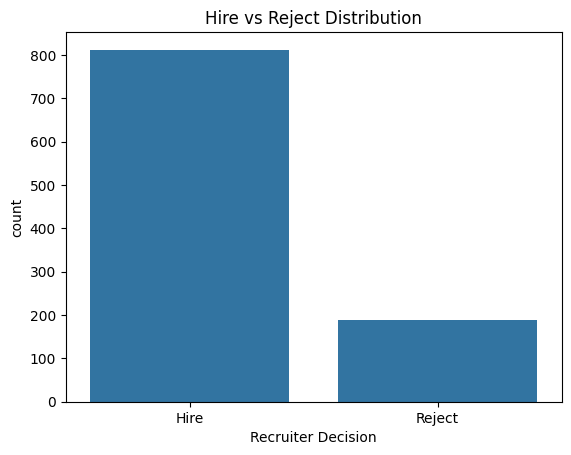

In [ ]:
sns.countplot(x='Recruiter Decision', data=data)
plt.title("Hire vs Reject Distribution")
plt.show()


In [ ]:
data.groupby('Recruiter Decision')['Experience (Years)'].mean()


,Experience (Years)
Recruiter Decision,
Hire,5.758621
Reject,1.170213


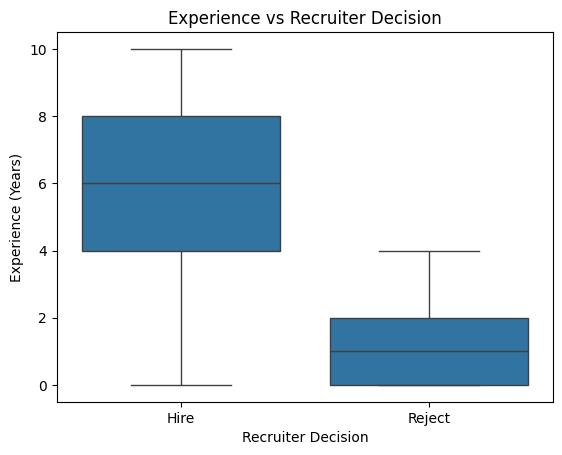

In [ ]:
sns.boxplot(x='Recruiter Decision', y='Experience (Years)', data=data)
plt.title("Experience vs Recruiter Decision")
plt.show()


In [ ]:
data.groupby('Recruiter Decision')['AI Score (0-100)'].mean()


,AI Score (0-100)
Recruiter Decision,
Hire,92.432266
Reject,47.313830


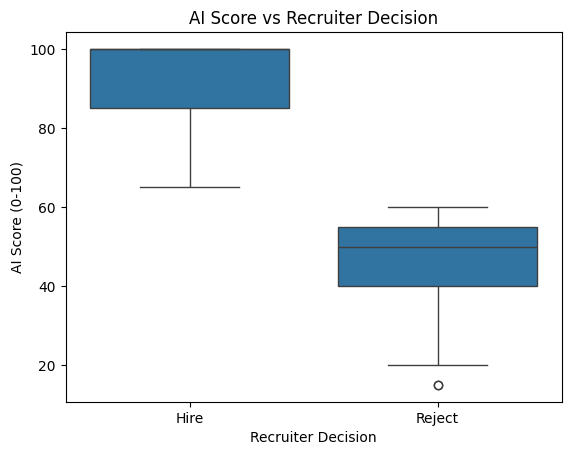

In [ ]:
sns.boxplot(x='Recruiter Decision', y='AI Score (0-100)', data=data)
plt.title("AI Score vs Recruiter Decision")
plt.show()


In [ ]:
data.groupby('Recruiter Decision')['Projects Count'].mean()


,Projects Count
Recruiter Decision,
Hire,5.647783
Reject,2.909574


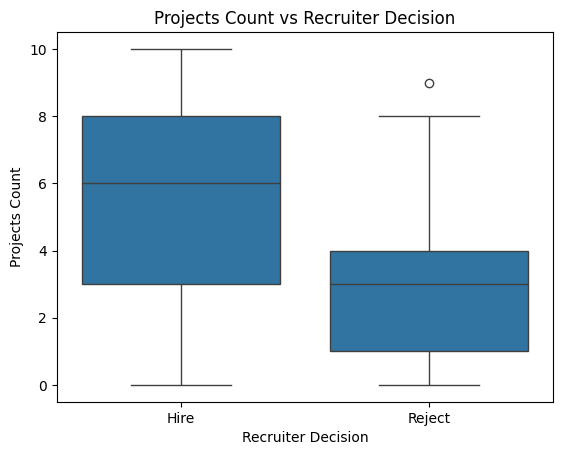

In [ ]:
sns.boxplot(x='Recruiter Decision', y='Projects Count', data=data)
plt.title("Projects Count vs Recruiter Decision")
plt.show()


In [ ]:
skills_df = data.explode('Skills_List')


In [ ]:
skill_hire_stats = (
    skills_df
    .groupby(['Skills_List', 'Recruiter Decision'])
    .size()
    .unstack(fill_value=0)
)

skill_hire_stats['Hire_Rate'] = (
    skill_hire_stats['Hire'] /
    (skill_hire_stats['Hire'] + skill_hire_stats['Reject'])
)

skill_hire_stats = skill_hire_stats.sort_values('Hire_Rate', ascending=False)
skill_hire_stats.head(10)


Recruiter Decision,Hire,Reject,Hire_Rate
Skills_List,,,
react,141,24,0.854545
c++,141,27,0.839286
tensorflow,172,33,0.839024
nlp,163,32,0.835897
java,156,32,0.829787
ethical hacking,170,36,0.825243
sql,305,65,0.824324
linux,157,34,0.821990
pytorch,155,34,0.820106


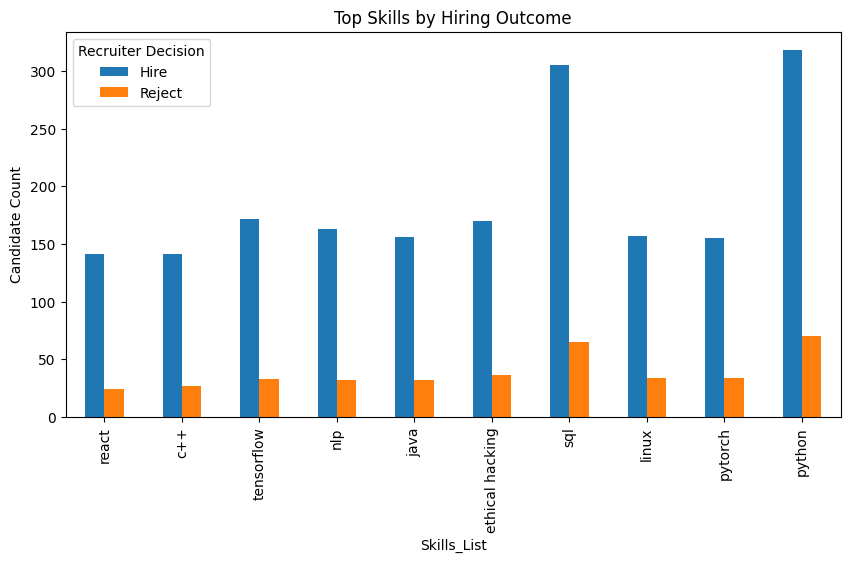

In [ ]:
top_skills = skill_hire_stats.head(10)

top_skills[['Hire', 'Reject']].plot(kind='bar', figsize=(10,5))
plt.title("Top Skills by Hiring Outcome")
plt.ylabel("Candidate Count")
plt.show()


In [ ]:
role_hire_rate = data.groupby('Job Role')['Hire_Flag'].mean().sort_values(ascending=False)
role_hire_rate


,Hire_Flag
Job Role,
Software Engineer,0.836910
AI Researcher,0.817121
Data Scientist,0.803922
Cybersecurity Analyst,0.792157


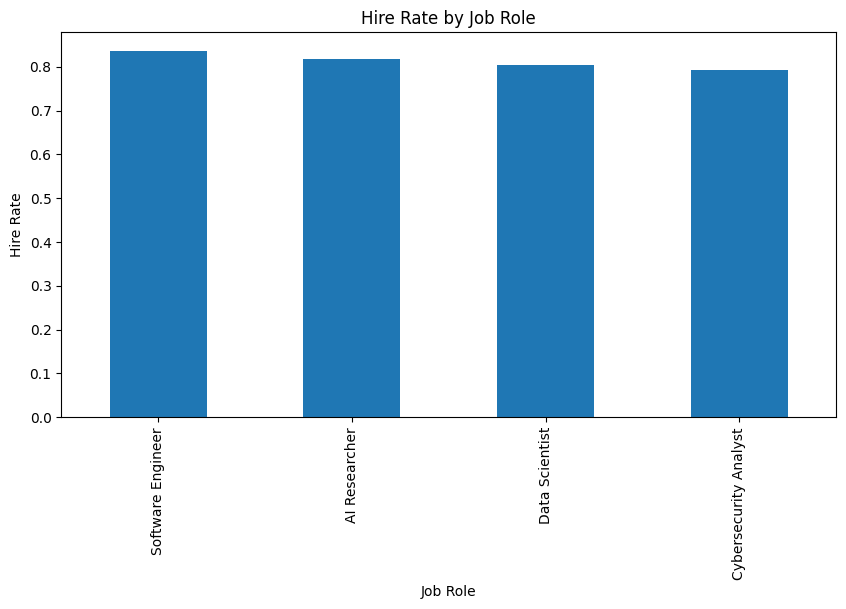

In [ ]:
role_hire_rate.plot(kind='bar', figsize=(10,5))
plt.title("Hire Rate by Job Role")
plt.ylabel("Hire Rate")
plt.show()


In [ ]:
role_expectations = data.groupby('Job Role').agg({
    'Experience (Years)': 'mean',
    'Projects Count': 'mean',
    'AI Score (0-100)': 'mean'
}).round(2)

role_expectations


,Experience (Years),Projects Count,AI Score (0-100)
Job Role,,,
AI Researcher,4.91,5.19,84.09
Cybersecurity Analyst,4.74,5.19,82.96
Data Scientist,4.88,4.94,83.84
Software Engineer,5.08,5.22,85.00


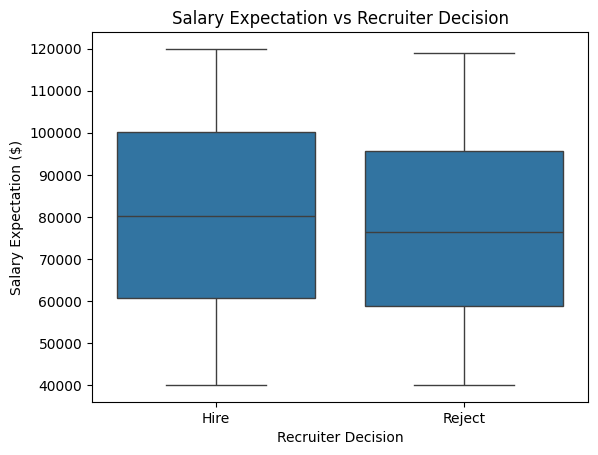

In [ ]:
sns.boxplot(x='Recruiter Decision', y='Salary Expectation ($)', data=data)
plt.title("Salary Expectation vs Recruiter Decision")
plt.show()


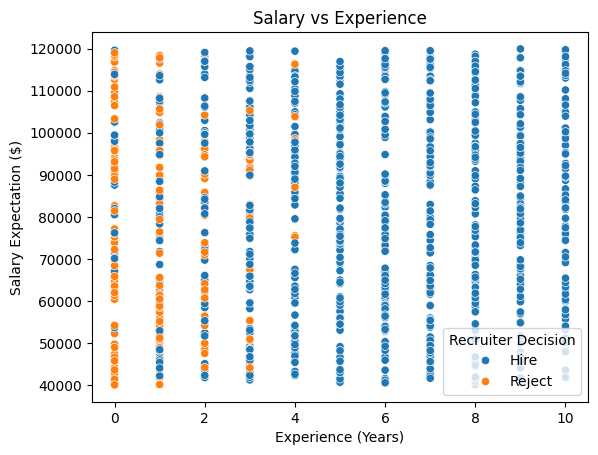

In [ ]:
sns.scatterplot(
    x='Experience (Years)',
    y='Salary Expectation ($)',
    hue='Recruiter Decision',
    data=data
)
plt.title("Salary vs Experience")
plt.show()


In [ ]:
data['Has_Certification'] = np.where(data['Certifications'] == 'None', 0, 1)


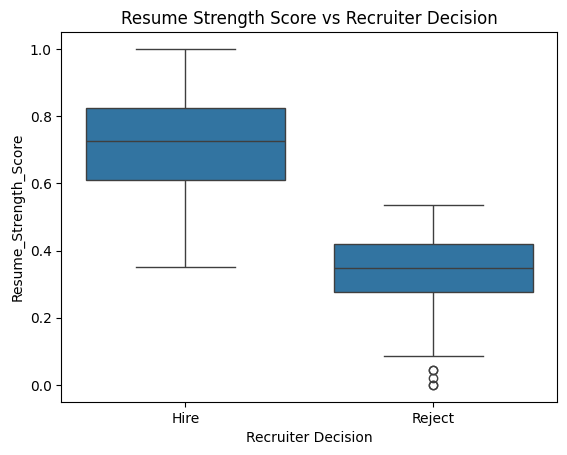

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[['AI_Norm', 'Exp_Norm', 'Proj_Norm']] = scaler.fit_transform(
    data[['AI Score (0-100)', 'Experience (Years)', 'Projects Count']]
)


data['Resume_Strength_Score'] = (
    0.35 * data['AI_Norm'] +
    0.25 * data['Exp_Norm'] +
    0.25 * data['Proj_Norm'] +
    0.15 * data['Has_Certification']
)


sns.boxplot(x='Recruiter Decision', y='Resume_Strength_Score', data=data)
plt.title("Resume Strength Score vs Recruiter Decision")
plt.show()


In [ ]:
false_negatives = data[
    (data['Resume_Strength_Score'] > data['Resume_Strength_Score'].quantile(0.75)) &
    (data['Recruiter Decision'] == 'Reject')
]

false_negatives[['Name', 'Job Role', 'Resume_Strength_Score', 'Salary Expectation ($)']].head()


,Name,Job Role,Resume_Strength_Score,Salary Expectation ($)
